<a href="https://colab.research.google.com/github/bagusas9090/AnalisisSentimenApkAccessbyKAI-/blob/main/Model_Klasifikasi_PSO%2BSVM%2BInterface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model Klasifikasi Paticle Swarm Optimization dengan Support Vector Machine**

## install Pandas & scikit-learn

In [ ]:
#install library
!pip install pandas
!pip install scikit-learn

## import dataset

In [ ]:
#Membaca data csv dan menampilkan dataframe
import pandas as pd
df= pd.read_csv('/content/data_Stemming4.csv')
df

,Unnamed: 0,Label,Text,Case Folding,Cleaning,Tokenizing,Stopwords,Stemming_text
0,0,Positif,@UNY_Base Pake Prameks or ka bandara belinya d...,@uny_base pake prameks or ka bandara belinya d...,pake prameks or ka bandara belinya di aplikasi...,"['pake', 'prameks', 'or', 'ka', 'bandara', 'be...","['pake', 'prameks', 'or', 'ka', 'bandara', 'be...",pake prameks or ka bandara beli aplikasi kai a...
1,1,Netral,Weekend recap Senin 13/5 -Mengajari pak bos me...,weekend recap senin 13/5 -mengajari pak bos me...,weekend recap senin mengajari pak bos mema...,"['weekend', 'recap', 'senin', 'mengajari', 'pa...","['weekend', 'recap', 'senin', 'mengajari', 'bo...",weekend recap senin ajar bos pakai aplikasi ka...
2,2,Positif,@tanyakanrl Di aplikasi KAI access ada fitur r...,@tanyakanrl di aplikasi kai access ada fitur r...,di aplikasi kai access ada fitur railfood pili...,"['di', 'aplikasi', 'kai', 'access', 'ada', 'fi...","['aplikasi', 'kai', 'access', 'fitur', 'railfo...",aplikasi kai access fitur railfood pilih tiket...
3,3,Positif,@tanyakanrl Ke kereta mkn atau klo malas tingg...,@tanyakanrl ke kereta mkn atau klo malas tingg...,ke kereta mkn atau klo malas tinggal pesan dri...,"['ke', 'kereta', 'mkn', 'atau', 'klo', 'malas'...","['kereta', 'mkn', 'klo', 'malas', 'tinggal', '...",kereta mkn klo malas tinggal pesan dri aplikas...
4,4,Positif,@tanyakanrl Pakai aplikasi kai access aja kala...,@tanyakanrl pakai aplikasi kai access aja kala...,pakai aplikasi kai access aja kalau takut pese...,"['pakai', 'aplikasi', 'kai', 'access', 'aja', ...","['pakai', 'aplikasi', 'kai', 'access', 'aja', ...",pakai aplikasi kai access aja takut sen langsung
...,...,...,...,...,...,...,...,...
1019,1019,Positif,@gaanbaru Dari gedebagenya bisa naik angkot tu...,@gaanbaru dari gedebagenya bisa naik angkot tu...,dari gedebagenya bisa naik angkot turun di per...,"['dari', 'gedebagenya', 'bisa', 'naik', 'angko...","['gedebagenya', 'angkot', 'turun', 'perempatan...",gedebagenya angkot turun empat trus jalan stas...
1020,1020,Netral,braw! mau nanya kalau beli tiket KA lokal ke s...,braw! mau nanya kalau beli tiket ka lokal ke s...,braw mau nanya kalau beli tiket ka lokal ke su...,"['braw', 'mau', 'nanya', 'kalau', 'beli', 'tik...","['braw', 'nanya', 'beli', 'tiket', 'ka', 'loka...",braw nanya beli tiket ka lokal surabaya tuh st...
1021,1021,Netral,@Unsoedfess1963 download apk kai akses beli ti...,@unsoedfess1963 download apk kai akses beli ti...,download apk kai akses beli tiket go show seja...,"['download', 'apk', 'kai', 'akses', 'beli', 't...","['download', 'apk', 'kai', 'akses', 'beli', 't...",download apk kai akses beli tiket go show jam ...
1022,1022,Positif,@MenfessUnej Kalo kamu belinya ndek kai access...,@menfessunej kalo kamu belinya ndek kai access...,kalo kamu belinya ndek kai access nggak usah d...,"['kalo', 'kamu', 'belinya', 'ndek', 'kai', 'ac...","['kalo', 'belinya', 'ndek', 'kai', 'access', '...",kalo beli ndek kai access nggak print langsung...


## Seleksi fitur/kolom pada data frame

In [ ]:
#Menyeleksi fitur, atribut atau kolom yang akan digunakan

df= df[['Stemming_text','Label']]
df

,Stemming_text,Label
0,pake prameks or ka bandara beli aplikasi kai a...,Positif
1,weekend recap senin ajar bos pakai aplikasi ka...,Netral
2,aplikasi kai access fitur railfood pilih tiket...,Positif
3,kereta mkn klo malas tinggal pesan dri aplikas...,Positif
4,pakai aplikasi kai access aja takut sen langsung,Positif
...,...,...
1019,gedebagenya angkot turun empat trus jalan stas...,Positif
1020,braw nanya beli tiket ka lokal surabaya tuh st...,Netral
1021,download apk kai akses beli tiket go show jam ...,Netral
1022,kalo beli ndek kai access nggak print langsung...,Positif


## Merubah label menjadi angka

In [ ]:
#Merubah label String menjadi Numerik menggunaan LabelEncoder
from sklearn.preprocessing import LabelEncoder

X = df['Stemming_text']
Y = df['Label']
#negatif adalah ’1’, positif adalah ’0’ dan netral adalah ’2’
target = {'Negatif':1, 'Positif':0, 'Netral':2}
df["Label"] = df["Label"].replace(target)

df

<ipython-input-4-89053e83f307>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Label"] = df["Label"].replace(target)


,Stemming_text,Label
0,pake prameks or ka bandara beli aplikasi kai a...,0
1,weekend recap senin ajar bos pakai aplikasi ka...,2
2,aplikasi kai access fitur railfood pilih tiket...,0
3,kereta mkn klo malas tinggal pesan dri aplikas...,0
4,pakai aplikasi kai access aja takut sen langsung,0
...,...,...
1019,gedebagenya angkot turun empat trus jalan stas...,0
1020,braw nanya beli tiket ka lokal surabaya tuh st...,2
1021,download apk kai akses beli tiket go show jam ...,2
1022,kalo beli ndek kai access nggak print langsung...,0


## install dan import PSO

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=42b2dd69cf21f662c6a697ba132050a728570126e2efdec62100073f4d57603f
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
pip install scikit-learn psopy

In [ ]:
import pandas as pd
from pyswarm import pso
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from psopy import minimize
import numpy as np

## Model Klasifikasi SVM dengan PSO

In [ ]:
# Memisahkan teks dan label
X = df['Stemming_text']
y = df['Label']

# TF-IDF Vectorizer => mengubah teks menjadi fitur berbasis TF-IDF (Term Frequency-Inverse Document Frequency).
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data training 80% dan testing 20%
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Fungsi tujuan untuk PSO
def objective_function(params):
    C = params[0]
    gamma = params[1]

    svm = SVC(C=C, kernel='linear', gamma=gamma, probability=True)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Minimize negative accuracy

# Batasan untuk hyperparameter SVM, dengan parameter C dan gamma yang akan dioptimalkan menggunakan PSO.
lb = [0.1, 0.01] #batas bawah/minim
ub = [10, 1] #batas atas/maksimum

# Pencarian hyperparameter
# PSO digunakan untuk mencari hyperparameter optimal dengan ukuran kawanan (swarmsize) 10 dan jumlah iterasi maksimum (maxiter) 10.
optimal_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)


#PRINT
# fungsi optimal C => memaksimalkan margin hyperplane dan mengurangi kesalahan klasifikasi
# fungsi optimal gamma => Mengontrol lebar dari kernel, Nilai gamma tinggi memungkinkan model untuk menyesuaikan lebih dekat dengan data pelatihan.
# Hyperparameter optimal
optimal_C, optimal_gamma = optimal_params
print(f"Optimal C: {optimal_C}, Optimal Gamma: {optimal_gamma}")

# Pelatihan model SVM dengan hyperparameter optimal
svm = SVC(C=optimal_C, kernel='linear', gamma=optimal_gamma, probability=True)
svm.fit(X_train, y_train)

# Evaluasi model (masih dalam bentuk persen)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Mengubah accuracy menjadi array
accuracy_array = np.array([accuracy_percentage])
print(f"Accuracy array: {accuracy_array}")
print(f"Accuracy: {accuracy_percentage:.2f}%")
print(classification_report(y_test, y_pred))

Stopping search: maximum iterations reached --> 10
Optimal C: 0.9549801709152306, Optimal Gamma: 0.2748344033303616
Accuracy array: [75.12195122]
Accuracy: 75.12%
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        46
           1       0.74      0.92      0.82       117
           2       0.62      0.31      0.41        42

    accuracy                           0.75       205
   macro avg       0.74      0.65      0.67       205
weighted avg       0.74      0.75      0.73       205



## Confusion Matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Confusion Matrix:
[[108   1   8]
 [ 11  33   2]
 [ 25   4  13]]


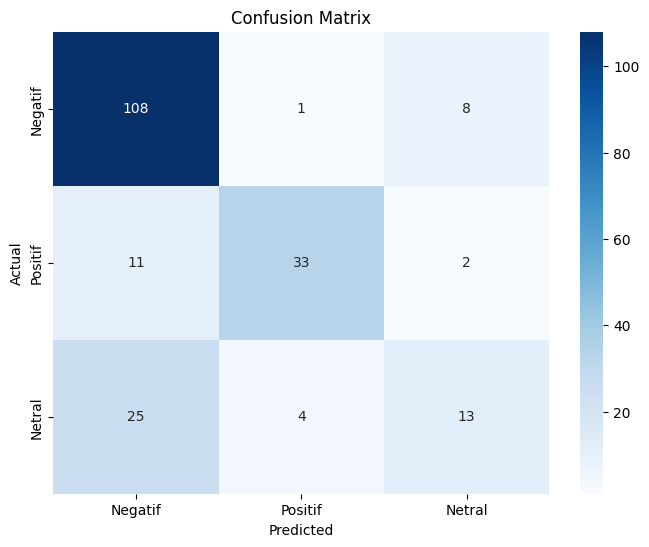

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, 2])
print(f"Confusion Matrix:\n{cm}")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

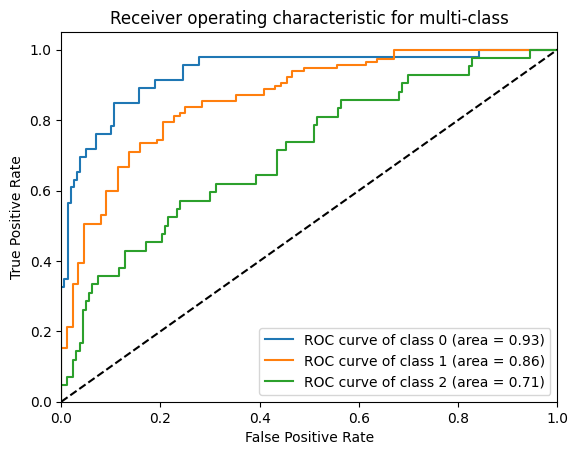

In [ ]:
# Kurva ROC (Receiver Operating Characteristic), untuk mengetahui nilai AUC (area under the curve)
# memastikan format y_test sudah benar
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Mencari skor probabilitas untuk setiap kelas
y_score = svm.predict_proba(X_test) # Replace 'clf' with your actual classifier object

# Menghitung kurva ROC dan area ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Visualisasi kurva ROC
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                 ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Kalkulasi Skor ROC AUC
roc_auc_score(y_test_bin, y_score, multi_class='ovr')

0.8351464347472088

## Implementasi model pada data nyata

In [ ]:
import joblib

In [ ]:
#menyimpan model yang telah dibuat
model_file_name = "svm_pso_model.joblib"
joblib.dump(svm, model_file_name)

NameError: name 'svm' is not defined

In [ ]:
#menyimpan tf-idf
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

NameError: name 'tfidf_vectorizer' is not defined

In [ ]:
#memuat model
loaded_svmpso_model = joblib.load(model_file_name)
vectorizer = joblib.load('tfidf_vectorizer.joblib')

def make_prediction(input_text):
    # Preprocess
    preprocessed_text = vectorizer.transform([input_text])

    # Predict
    prediction = loaded_svmpso_model.predict(preprocessed_text)

    info= ''

    if(prediction[0] == 0):
        info = 'Positif'
    elif(prediction[0] == 1):
        info = 'Negatif'
    elif(prediction[0] == 2):
        info = 'Netral'
    final_info = 'Termasuk Sentimen : {}'.format(info)
    return final_info

text_example = "aplikasi sangat membantu"

print(make_prediction(text_example))

## Membangun Gradio untuk Interface

In [ ]:
#install gradio
!pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
# import
import gradio as gr

In [ ]:
headline = "Analisis sentimen aplikasi Access by KAI"

iface = gr.Interface(fn=make_prediction, inputs="text", outputs="text", title=headline)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6329ab452b79806f22.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
